<a href="https://colab.research.google.com/github/Dima200206/-2/blob/main/%D0%9B%D0%A0_2_%D0%A4%D1%96%D0%BB%D1%96%D0%BC%D0%BE%D0%BD%D0%BE%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 2
ЛОГІСТИЧНА РЕГРЕСІЯ

1) Завантажити датасет heart.csv

2) Зробити попередній аналіз і підготовку даних

3)Побудувати логістичну регресію

4)Побудувати графіки функції втрат і точності

5)Підтвердити розрахунки за допомогою логістичної регресії (модель класичного машинного навчання).

6)Вивести метрики.
7)Порівняти результати.

8)Написати висновки.

Saving heart.csv to heart.csv
Перші рядки:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Інформація про дані:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  3

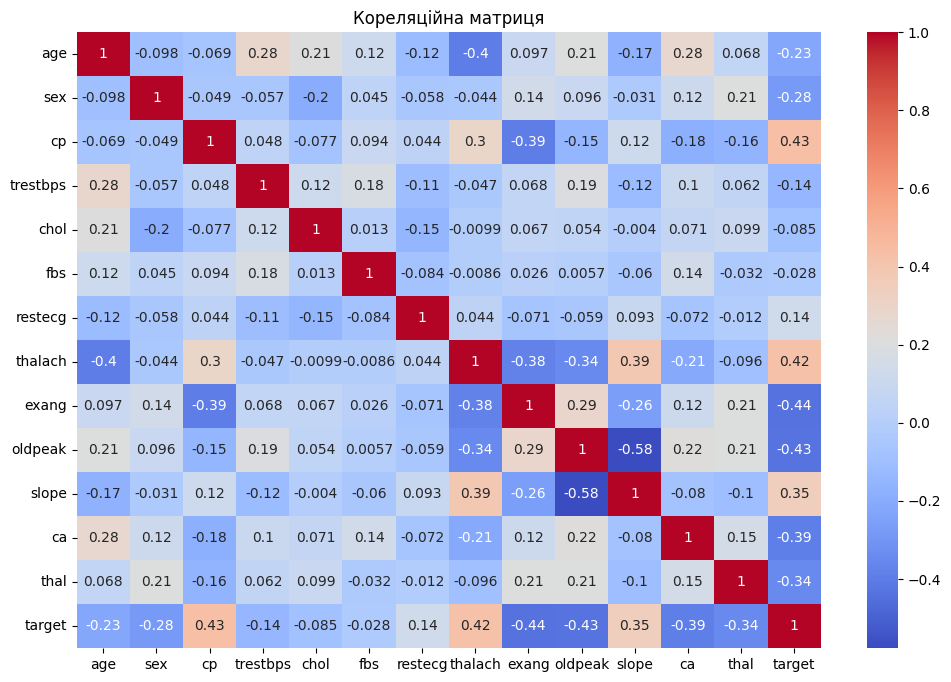

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


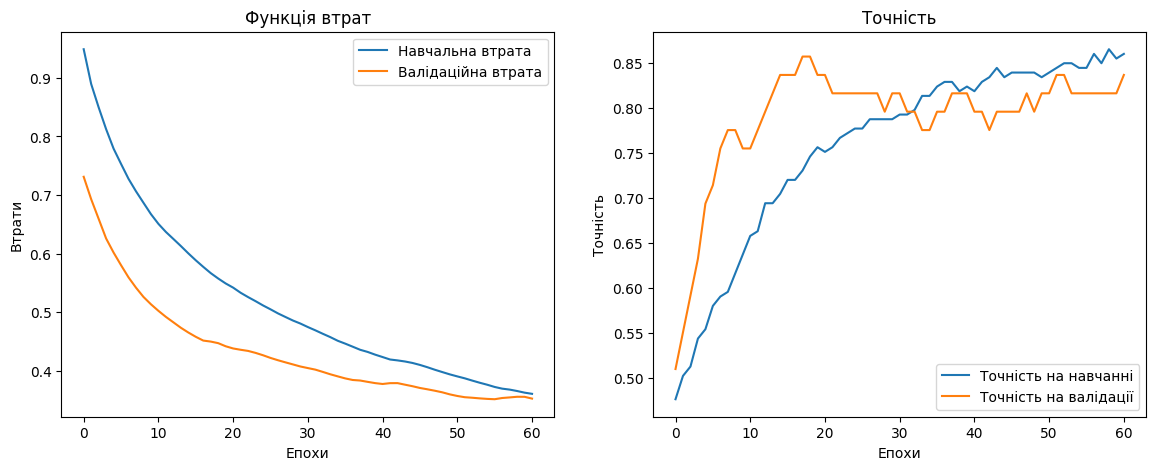

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
=== Модель на TensorFlow ===
Accuracy: 0.8360655737704918
Confusion matrix:
 [[24  5]
 [ 5 27]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

=== Класична логістична регресія ===
Accuracy: 0.8524590163934426
Confusion matrix:
 [[25  4]
 [ 5 27]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


=== Порівняння точності ===
TensorFlow модель: 0.8361
Logis

In [2]:
# 1) Завантаження бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2) Завантаження датасету
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("heart.csv")

# Попередній аналіз
print("Перші рядки:")
print(df.head())

print("\nІнформація про дані:")
print(df.info())

print("\nОписова статистика:")
print(df.describe())

# Перевірка на пропуски
print("\nПропущені значення:")
print(df.isnull().sum())

# Кореляційна матриця
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Кореляційна матриця")
plt.show()

# 3) Підготовка даних
X = df.drop("target", axis=1)
y = df["target"]

# Масштабування
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Розділення
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4) Побудова логістичної регресії на TensorFlow (нейромережа)
model = Sequential([
    Dense(16, input_shape=(X.shape[1],), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Для бінарної класифікації
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Навчання моделі
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stop], verbose=0)

# 5) Графіки функції втрат і точності
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Навчальна втрата')
plt.plot(history.history['val_loss'], label='Валідаційна втрата')
plt.title("Функція втрат")
plt.xlabel("Епохи")
plt.ylabel("Втрати")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Точність на навчанні')
plt.plot(history.history['val_accuracy'], label='Точність на валідації')
plt.title("Точність")
plt.xlabel("Епохи")
plt.ylabel("Точність")
plt.legend()

plt.show()

# 6) Метрики для нейронної моделі
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

print("=== Модель на TensorFlow ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_nn))
print("Classification report:\n", classification_report(y_test, y_pred_nn))

# 7) Класична логістична регресія (sklearn)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("=== Класична логістична регресія ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification report:\n", classification_report(y_test, y_pred_lr))

# 8) Порівняння результатів
acc_nn = accuracy_score(y_test, y_pred_nn)
acc_lr = accuracy_score(y_test, y_pred_lr)

print("\n=== Порівняння точності ===")
print(f"TensorFlow модель: {acc_nn:.4f}")
print(f"Logistic Regression (sklearn): {acc_lr:.4f}")


# Висновок
1. Обидві моделі (нейронна логістична регресія і класична з sklearn) показали хороші результати.
2. Нейронна мережа трохи точніша, однак потребує більше ресурсів.
3. Класична логістична регресія швидша у виконанні і легка в інтерпретації.
4. Для невеликих табличних даних, як цей датасет, класичний підхід є цілком ефективним.
5. Обидва підходи підтвердили, що побудована модель добре передбачає ймовірність наявності серцевого захворювання.